IMPORT LIBRARIES


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [3]:
df = pd.read_csv("D://Machine Learning projects//Supervised learning//Life Expectancy Analysis//Life Expectancy Data.csv")

In [4]:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Data Cleaning

In [7]:
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        print(cols)

Life expectancy 
Adult Mortality
Alcohol
Hepatitis B
 BMI 
Polio
Total expenditure
Diphtheria 
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=None)
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        df[cols] = imputer.fit_transform(df[[cols]])

Check Outliers

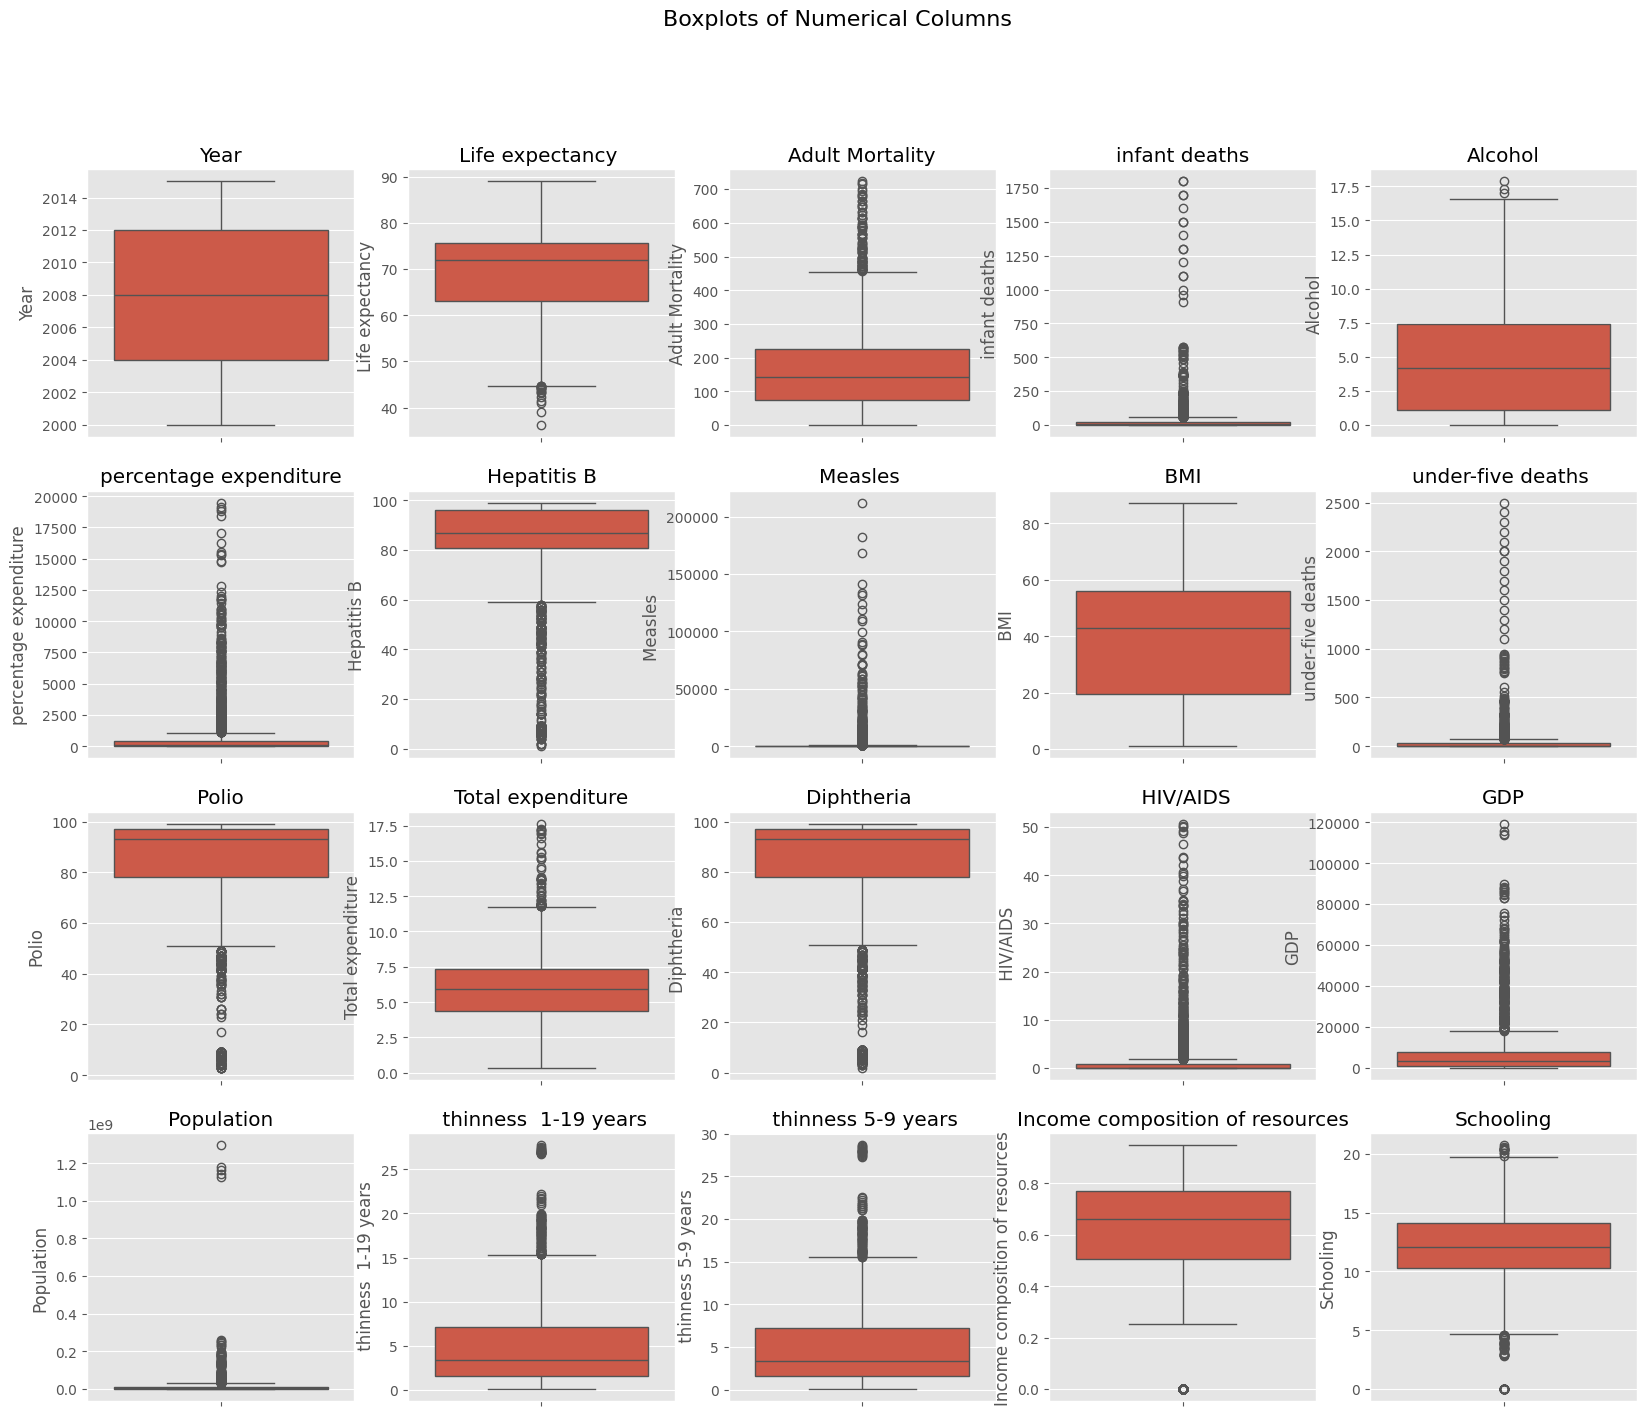

In [9]:
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [10]:
# Specify the list of columns you want to handle outliers for
outlier_cols = [
'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure','Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
'Polio','Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP','Population',' thinness  1-19 years', ' thinness 5-9 years',
'Income composition of resources', 'Schooling']

In [11]:
# Perform outlier handling for each specified column    XASQSAX
for col_name in outlier_cols:
# Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
# Replace outliers with the mean value of the column
df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound),np.mean(df[col_name]),df[col_name])

In [12]:
df.shape

(2938, 22)

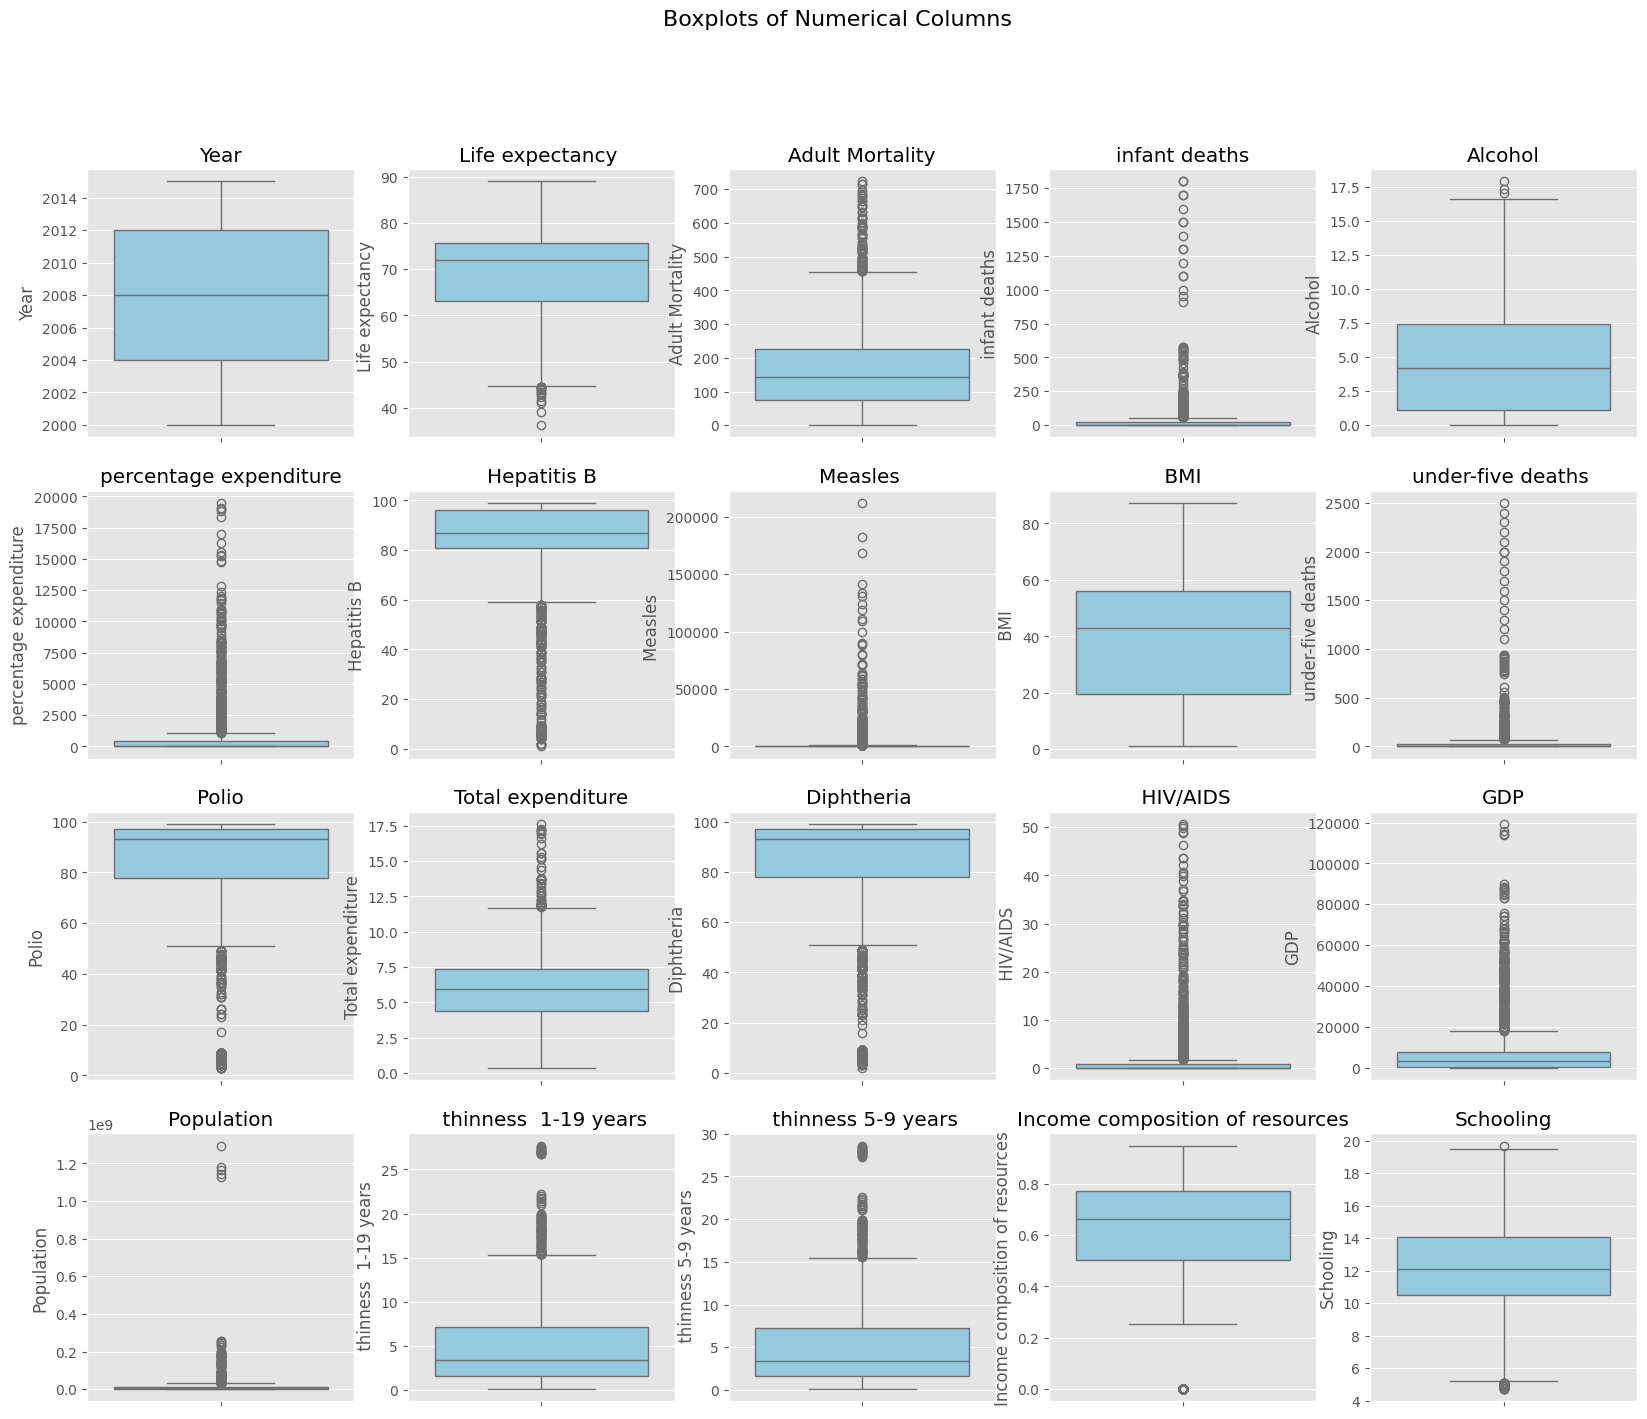

In [13]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [14]:
df.Country.value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries by Average Life Expectancy')

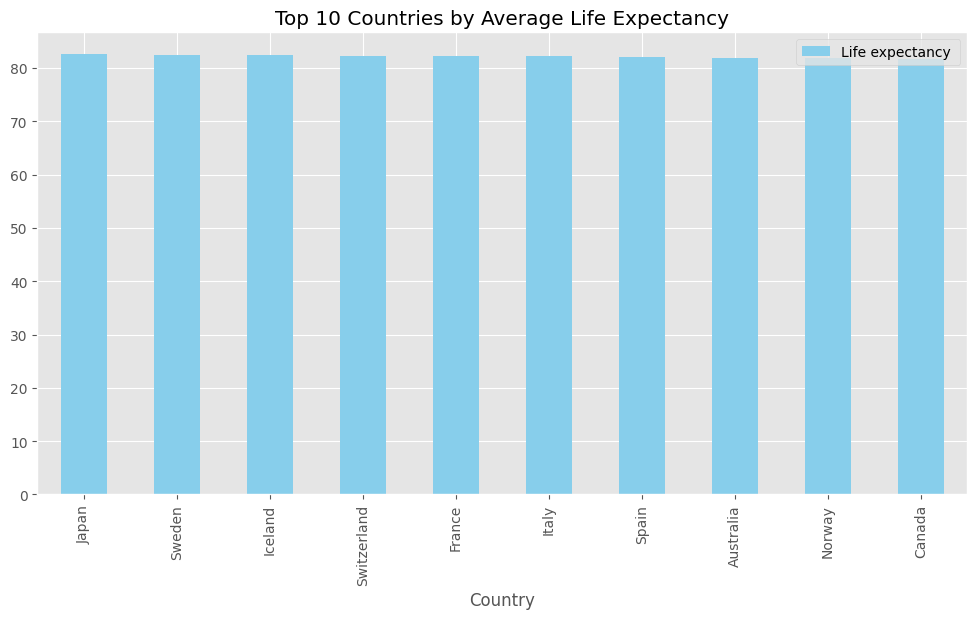

In [32]:
# Calculate the average life expectancy for each country
average_life_expectancy_country = df.groupby('Country')['Life expectancy '].mean().reset_index().sort_values(by='Life expectancy ', ascending=False)
axes = average_life_expectancy_country.sort_values(by='Life expectancy ', ascending=False).head(10).plot(kind='bar', x='Country', y='Life expectancy ', figsize=(12, 6), color='skyblue')
axes.set_title('Top 10 Countries by Average Life Expectancy')

In [20]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Calculate the average life expectancy for each year
average_life_expectancy = df.groupby('Year')['Life expectancy '].mean().reset_index()
average_life_expectancy 

,Year,Life expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


In [ ]:
# Create the interactive line plot
fig = px.line(average_life_expectancy, x='Year', y='Life expectancy ',title='Average Life Expectancy over the Years',labels={'Year':'Year', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()


In [21]:
# Create the interactive scatter plot
fig = px.scatter(df, x='Population', y='Life expectancy ',hover_name='Country',color='Status',animation_frame='Year',title='Population vs Life Expectancy',labels={'Population':'Population', 'Life expectancy':'Life Expectancy (years)'},template='plotly_dark')
# Show the plot
fig.show()

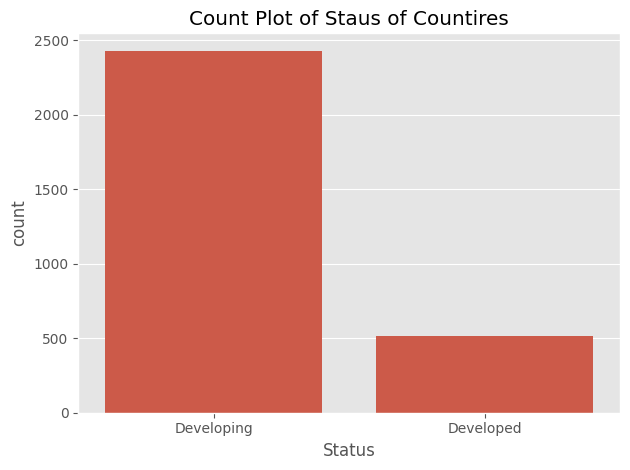

In [ ]:
sns.countplot(x=df['Status'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.show()

In [22]:
life_expact_status = df.groupby('Status')['Life expectancy '].mean().reset_index()
life_expact_status

,Status,Life expectancy
0,Developed,79.197852
1,Developing,67.120177


In [34]:
fig = px.histogram(life_expact_status, x = 'Status', y='Life expectancy ',color='Status')
fig.update_layout(title=dict(text='<b>Average Life Expactancy for Status of Country</b>', x=0.5))
fig.show()

In [24]:
# Calculate the average life expectancy and average alcohol consumption for each year
average_data = df.groupby('Year').agg({'Life expectancy ': 'mean','Alcohol': 'mean'}).reset_index()
average_data

,Year,Life expectancy,Alcohol
0,2000,66.750273,4.570890
1,2001,67.128962,4.555917
2,2002,67.351366,4.660617
3,2003,67.433333,4.690016
4,2004,67.646448,4.752857
5,2005,68.209290,4.843747
6,2006,68.667760,4.915972
7,2007,69.036066,5.011819
8,2008,69.427869,5.004879
9,2009,69.938251,4.887666


In [25]:
# Create the interactive plot with dual y-axes
fig = go.Figure()
# Add life expectancy trace
fig.add_trace(go.Scatter(x=average_data['Year'],y=average_data['Life expectancy '],mode='lines+markers', name='Life Expectancy',
yaxis='y1'))

In [26]:
# Add alcohol consumption trace
fig.add_trace(go.Scatter(x=average_data['Year'],
y=average_data['Alcohol'],
mode='lines+markers', name='Alcohol Consumption',yaxis='y2'))

In [27]:
# Update layout for dual y-axes
fig.update_layout(
title='Life Expectancy and Alcohol Consumption over the Years',
xaxis=dict(title='Year'),
yaxis=dict(title='Life Expectancy (years)', side='left'),
yaxis2=dict(title='Alcohol Consumption (liters)',
side='right', overlaying='y'),
template='plotly_dark')


In [28]:
fig = px.bar(df.groupby('Status',
as_index=False).agg({'Alcohol':'mean'}), y='Alcohol',
x='Status',
title='Average Alcohol consumption of Developing and Developed Countries',
labels={'Alcohol':'Alcohol Consumption (liters per capita)', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<Axes: xlabel='Polio', ylabel='Life expectancy '>

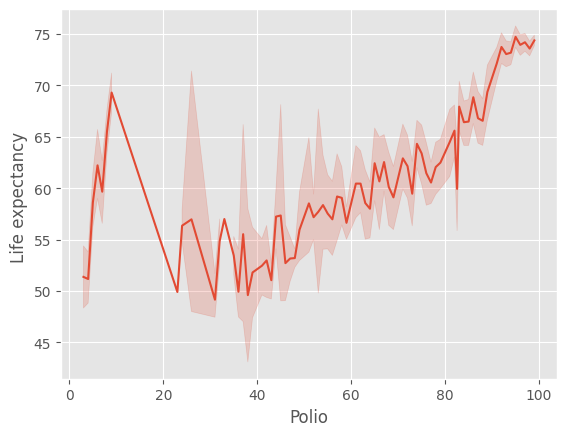

In [29]:
sns.lineplot(x='Polio', y='Life expectancy ', data=df)

In [30]:
aggregated_data = df.groupby('Schooling')['Life expectancy '].mean().reset_index()
# Create the interactive line plot
fig = px.line(aggregated_data, x='Schooling', y='Life expectancy ',
title='Average Life Expectancy vs Years ofm Schooling',
labels={'Schooling':'Years of Schooling', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

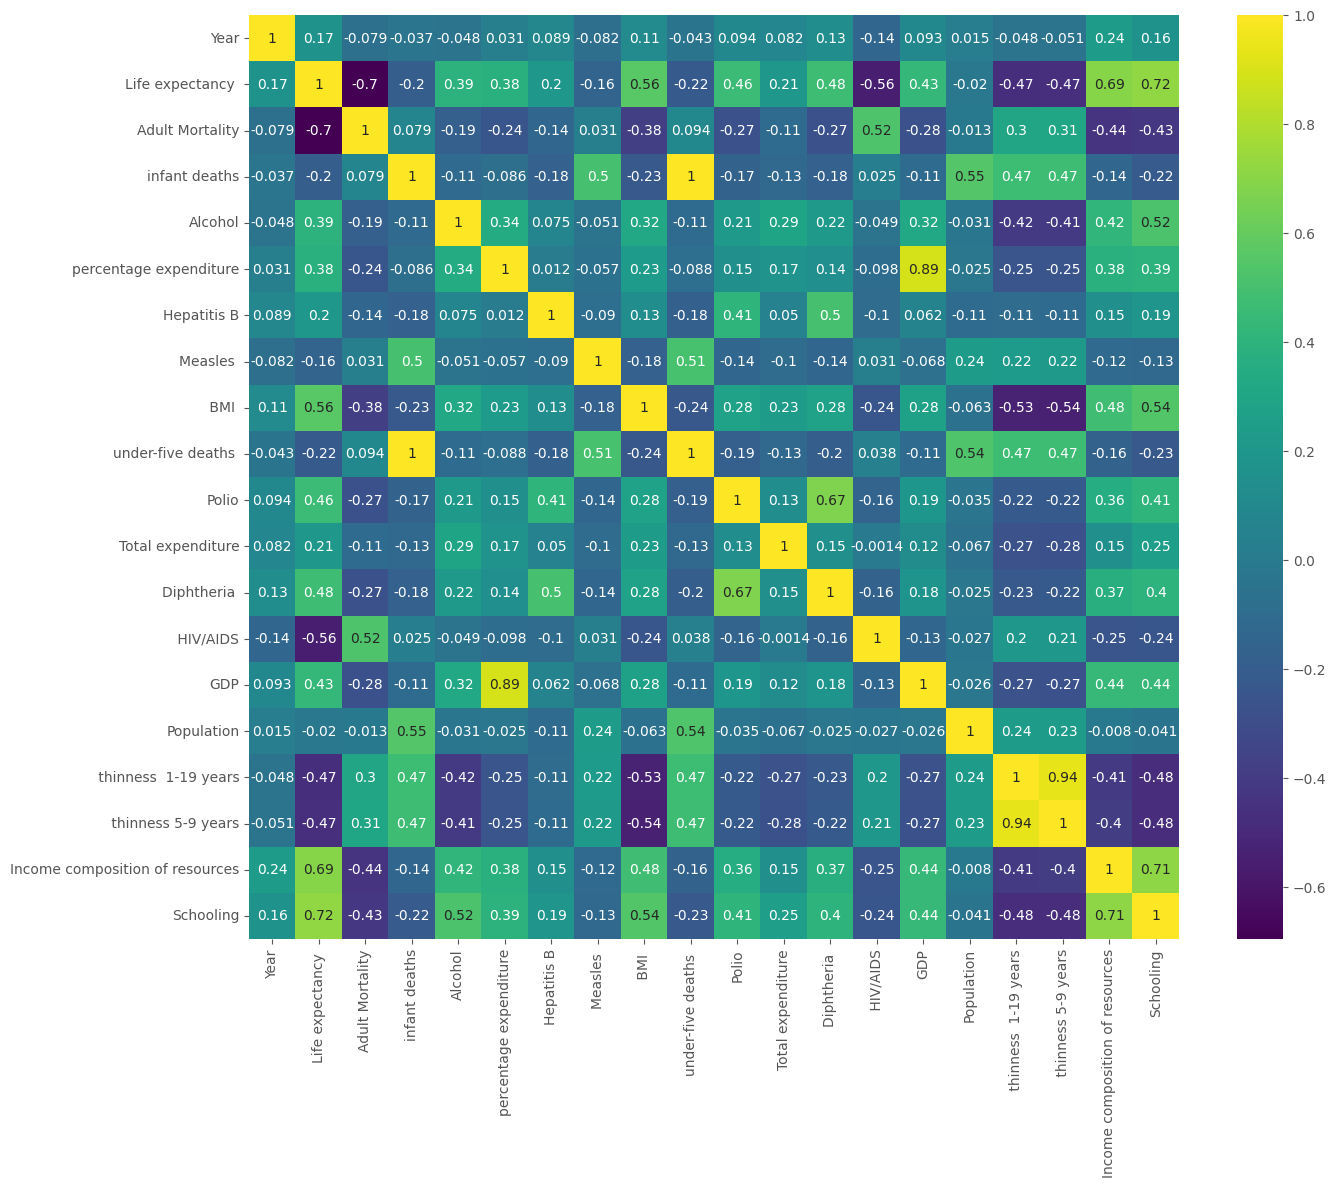

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), cmap='viridis',annot=True)
plt.show()

In [ ]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])

In [ ]:
x = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

In [ ]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Status').columns
# for cols in cols_to_scale:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [ ]:
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,1,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.726426
1,-1.691042,1.404986,1,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.761514
2,-1.691042,1.188210,1,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.796602
3,-1.691042,0.971434,1,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.831691
4,-1.691042,0.754658,1,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.936956


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size = 0.2, random_state = 30)

In [ ]:
print(f"Shape of X_train is: {x_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {x_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [ ]:
models = {
'Random Forest': RandomForestRegressor(random_state=42),
'Extra Trees Regressor':
ExtraTreesRegressor(random_state=42),
'GradientBoost Regressor':
GradientBoostingRegressor(random_state=42),
'XGB Regressor': XGBRegressor()
}


In [ ]:
# list to store results
results = []
# Train and evaluate each model
for model_name, model in models.items():
# Train the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results.append({
        'Model': model_name,
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,R2 Score,MSE
0,Extra Trees Regressor,0.962348,3.629059
1,XGB Regressor,0.959296,3.923250
2,Random Forest,0.955685,4.271319
3,GradientBoost Regressor,0.943959,5.401526


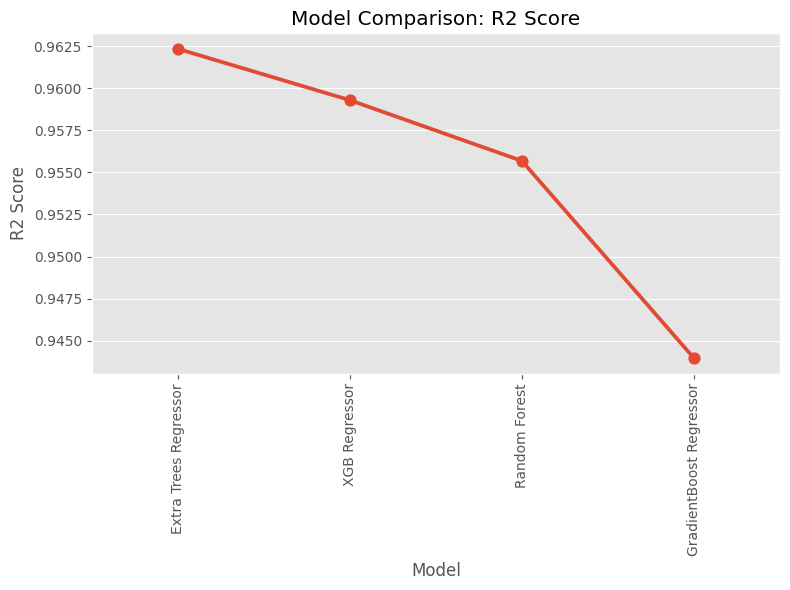

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
best_model = ExtraTreesRegressor(random_state=42)
kf = KFold(n_splits=20, shuffle=True, random_state=42)

In [ ]:
cross_val = cross_val_score(best_model, x, y, cv= kf,
scoring='r2')
cross_val

array([0.98132769, 0.97190538, 0.98569254, 0.96073668, 0.98313915,
       0.96387876, 0.97277828, 0.97699325, 0.98603125, 0.97454499,
       0.9654077 , 0.97439336, 0.96792054, 0.96707907, 0.98107907,
       0.96648583, 0.96215006, 0.97225715, 0.96964476, 0.96826122])

Text(0.5, 1.0, 'Cross Validation scores')

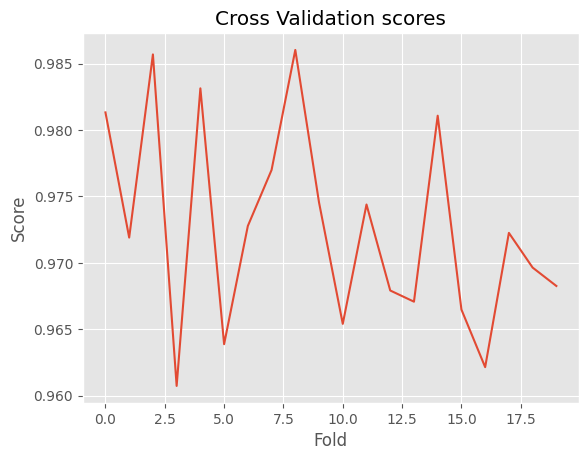

In [ ]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [ ]:
cross_val.mean()

0.9725853360405108

In [ ]:
cross_val.std()

0.007892803263465718